In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as pyplt

In [4]:
yolo = cv2.dnn.readNet('./yolov3-tiny.weights','./yolov3-tiny.cfg')

In [5]:
classes = []
with open("./coco.names","r") as f:
  classes = f.read().splitlines()

In [6]:
classes

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [7]:
len(classes)

80

In [8]:
img = cv2.imread('./person_cycle.jpg')

In [9]:
blob = cv2.dnn.blobFromImage(img, scalefactor=1/255.0, size=(640, 640), mean=(0, 0, 0), swapRB=True, crop=False)

In [10]:
blob.shape

(1, 3, 640, 640)

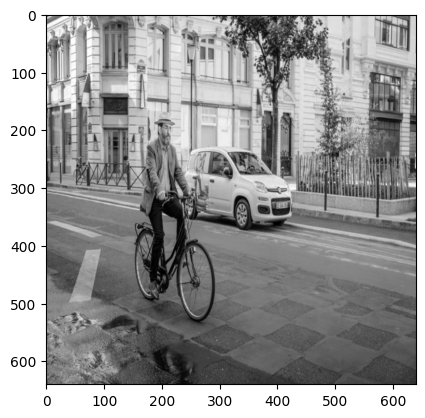

In [11]:
b = blob[0, 0, :, :]
pyplt.imshow(b, cmap='gray')

In [12]:
yolo.setInput(blob)

In [13]:
outputlayersname = yolo.getUnconnectedOutLayersNames()
layeroutput = yolo.forward(outputlayersname)

In [14]:
height, width = img.shape[:2]

In [15]:
boxes = []
confidences = []
class_ids = []

for output in layeroutput:
  for detection in output:
    score = detection[5:]
    class_id = np.argmax(score)
    confidence = score[class_id]
    if confidence > 0.5:
      center_x = int(detection[0] * width)
      center_y = int(detection[1] * height)
      w = int(detection[2] * width)
      h = int(detection[3] * height)
      x = int(center_x - w/2)
      y = int(center_y - h/2)

      boxes.append([x,y,w,h])
      confidences.append(float(confidence))
      class_ids.append(class_id)

In [16]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

In [17]:
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0, 255, size=(len(classes), 3))

In [18]:
for i in indexes.flatten():
    x, y, w, h = boxes[i]
    label = str(classes[class_ids[i]])
    conf = str(round(confidences[i], 2))
    color = colors[i]
    cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
    cv2.putText(img, label + " " + conf, (x, y - 10), font, 1, (255, 255, 255), 2)

In [19]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [20]:
print(f"Detections: {len(boxes)}")
for i, box in enumerate(boxes):
    print(f"Box {i}: {box}, Confidence: {confidences[i]}, Class ID: {class_ids[i]}")


Detections: 4
Box 0: [321, 249, 354, 141], Confidence: 0.5824825763702393, Class ID: 2
Box 1: [385, 250, 283, 143], Confidence: 0.9310110211372375, Class ID: 2
Box 2: [260, 180, 149, 352], Confidence: 0.9800253510475159, Class ID: 0
Box 3: [228, 343, 237, 222], Confidence: 0.545195460319519, Class ID: 1


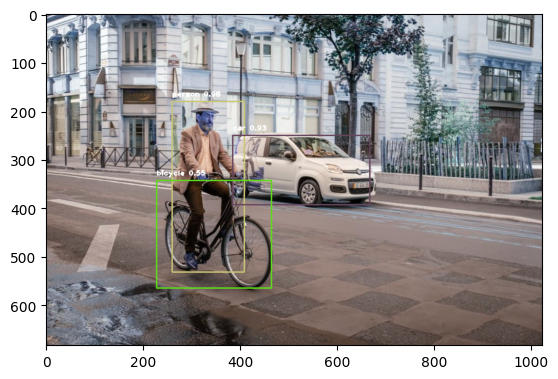

In [21]:
pyplt.imshow(img)